<a href="https://colab.research.google.com/github/abishekabi/amber-detector/blob/main/LicensePlate_detector_reader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
!pip install pytesseract
# pytesseract.pytesseract.tesseract_cmd = r'/usr/local/bin/pytesseract'

In [40]:
import cv2
import numpy as np
import tensorflow as tf
import imutils
import pytesseract
from imutils import contours
import easyocr
from PIL import ImageEnhance, ImageFilter, Image
! pip install wget
!wget http://www.zemris.fer.hr/projects/LicensePlates/english/baza_slika.zip
!  pip install easyocr

In [41]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [42]:
%cd '/content/gdrive/MyDrive/Colab Notebooks/CarMakeModelDetection'

/content/gdrive/MyDrive/Colab Notebooks/CarMakeModelDetection


In [43]:
img=cv2.imread('car_image.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

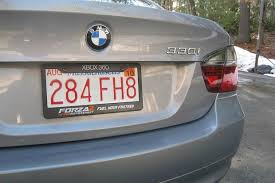

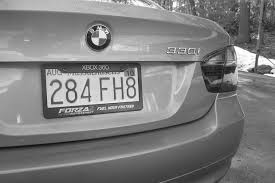

In [44]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)
cv2_imshow(gray)

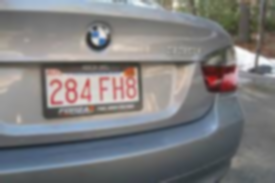

In [45]:
imgBlurred = cv2.GaussianBlur(img, (7, 7), 0) 
cv2_imshow(imgBlurred)

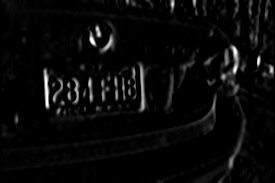

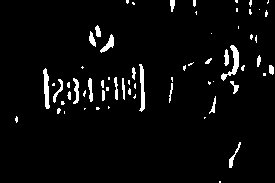

In [46]:
gray = cv2.cvtColor(imgBlurred,cv2.COLOR_BGR2GRAY)  
sobelx = cv2.Sobel(gray, cv2.CV_8U,  
                       1, 0, ksize = 3)   
cv2_imshow(sobelx)
ret2, threshold_img = cv2.threshold(sobelx,0, 255, 
                           cv2.THRESH_BINARY + cv2.THRESH_OTSU) 
cv2_imshow(threshold_img)

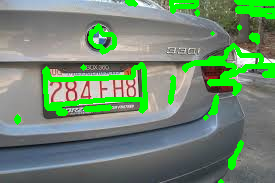

-1

In [49]:
contours1,_=cv2.findContours(morph_n_thresholded_img,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
img1=img.copy()
cv2.drawContours(img1, contours1, -1, (0,255,0), 3)
cv2_imshow(img1)
cv2.waitKey()

In [50]:
! apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


In [51]:
! apt install libtesseract-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libtesseract-dev is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


In [71]:
! pip install Pillow
! pip install pytesseract
! sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


In [83]:
img=cv2.imread('car_image.jpg')
#imgBlurred = cv2.GaussianBlur(img, (7, 7), 0) 

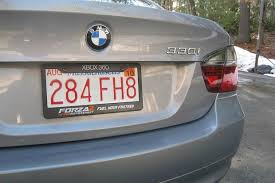

In [84]:
cv2_imshow(img)

In [112]:
import easyocr

reader = easyocr.Reader(['en'])

img=cv2.imread('car_image.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

result = reader.readtext(gray)
print(result)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[166, 48], [196, 48], [196, 54], [166, 54]], '=0=', 7.525505679950584e-06), ([[43, 71], [143, 71], [143, 111], [43, 111]], '284 F118', 0.1304122358560562)]


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


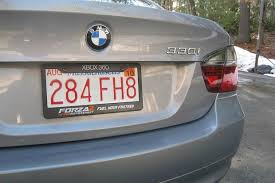

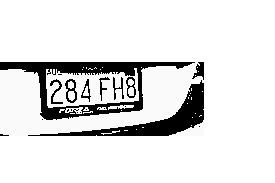

284 F118


In [209]:


reader = easyocr.Reader(['en'])

img = cv2.imread('car_image.jpg')
cv2_imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

thresh = cv2.adaptiveThreshold(gray, 250, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 255, 1)
# cv2_imshow(thresh)

kernel = np.ones((1, 1), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)

ctrs, hierarchy = cv2.findContours(img_dilation.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])

clean_plate = 255 * np.ones_like(img_dilation)
roi = None
area = float('inf')
for i, ctr in enumerate(sorted_ctrs):
    x, y, w, h = cv2.boundingRect(ctr)

    roi = img_dilation[y:y + h, x:x + w]
    final_img = None

    # these are very specific values made for this image only - it's not a factotum code
    if h > 70 and w > 100:
        a = w*h
        if a < area:
          clean_plate[y:y + h, x:x + w] = roi
          area = a

cv2_imshow(clean_plate)

result = reader.readtext(img, detail = 0, blocklist = "abcdefghijklmnopqrstuvwxyz")
unsupported = ['=','"','/']
for i in result:
  flag = 0
  for un_ch in unsupported:
    if un_ch in i:
      flag = 1
      continue
  if flag == 0:
    print(i)

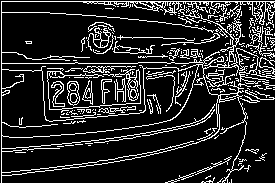

In [78]:
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

dst = cv2.Canny(grayImage, 50, 100)

dst = cv2.morphologyEx(dst, cv2.MORPH_RECT, np.zeros((5,5), np.uint8), 
                       iterations=1)

contours, heirarchy = cv2.findContours(dst, cv2.RETR_EXTERNAL, 
                                            cv2.CHAIN_APPROX_NONE)

for i in range(0, len(contours)):
    if cv2.contourArea(contours[i]) > 200:
        x,y,w,h = cv2.boundingRect(contours[i])
        # The w constrain to remove the vertical lines
        if w > 10:
            cv2.rectangle(dst, (x, y), (x+w, y+h), (0, 0, 255), 1)
            cv2_imshow(dst)

# Reading license plate using tesseract module


In [23]:
plate=pytesseract.image_to_string(img,lang ='eng')

In [ ]:
!pip install wget

# **Experiment with some more pre processing and OCR **

None


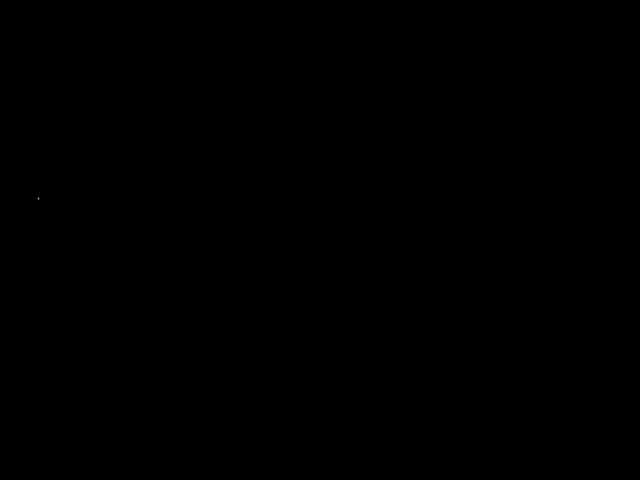

In [194]:


image = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/CarMakeModelDetection/Car/040603/P1010001.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(gray, 30, 200) #Perform Edge detection
cnts, hier = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts, _ = contours.sort_contours(cnts, method="left-to-right")
# cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:10]
screenCnt = None
for c in cnts:
      # approximate the contour
      peri = cv2.arcLength(c, True)
      approx = cv2.approxPolyDP(c, 0.018 * peri, True)
      # if our approximated contour has four points, then
      # we can assume that we have found our screen
      if len(approx) == 4:
            print(screenCnt)
            screenCnt = approx
            break

mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
new_image = cv2.bitwise_and(img,img,mask=mask)
cv2_imshow(new_image)